# Problem 1

You are using rectangle method if intgration to estimate $\pi$ value or solve other integration tasks.

pi ~ 3.140651129014788


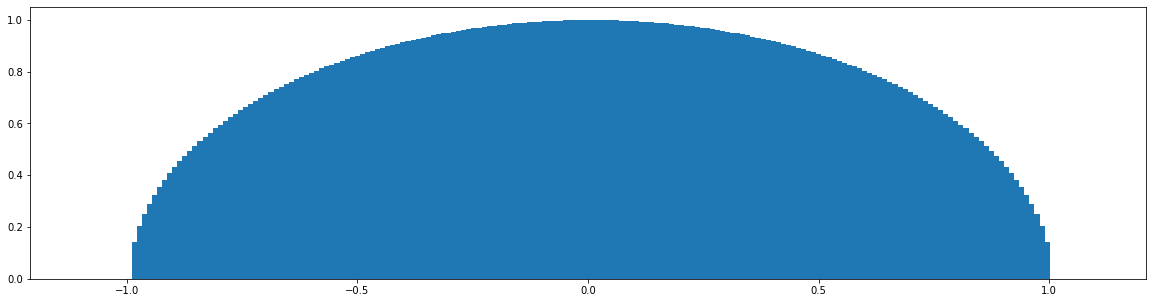

In [2]:
import matplotlib.pyplot as plt


def circle(x, r=1.):
    return (r ** 2  - x ** 2) ** .5 if abs(x) < r else 0


def integral(func, start, finish, steps=100, verbose=False):
    # make your improvements in this function
    summ = 0.
    step = (0. + finish - start) / steps
    X, Y = [], []
    for i in range(steps):
        x = start + i * step
        y = func(x)
        if verbose:
            X.append(x)
            Y.append(y)
        summ += y * step
    if verbose:
        return summ, X, Y
    else:
        return summ
    

steps = 200
s, X, Y = integral(circle, -1.1, 1.1, steps, verbose=True)
print('pi ~', s * 2)
plt.figure(figsize=(20, 5))
plt.bar(X, Y, align='edge', width=2.2/steps)
plt.show()

Error for s=100: 0.0033241424912922035
Error for s=1000: 0.00010517658765119009
Error for s=10000: 3.3261592111699656e-06
Error for s=100000: 1.0518294857320143e-07
Error for s=1000000: 3.326338315901012e-09
Error for s=10000000: 1.0507061887210511e-10
Log error


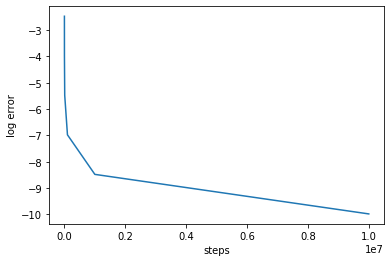

In [5]:
import numpy as np

steps = [100, 1000, 10000, 100000, 1000000, 10000000]
errors = []
for s in steps:
    i = integral(circle, -1., 1., s)
    error = abs(np.pi - (i * 2))
    errors.append(np.log10(error))
    print(f"Error for s={s}: {error}")

print('Log error')
plt.xlabel("steps")
plt.ylabel("log error")
plt.plot(steps, errors)
plt.show()

Everything looked good, but once you decided to find $\pi$ other way:

$\int _{-\infty }^{\infty }e^{-x^{2}}\,dx={\sqrt {\pi }}$

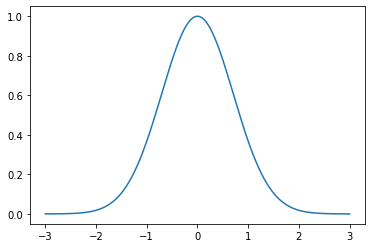

In [6]:
import numpy as np

def figure(x):
    return np.e ** -(x ** 2)

X = np.linspace(-3, 3, 2000)
Y = [figure(x) for x in X]
plt.plot(X, Y)
plt.show()

Error for s=1000: 1.2878587085651816e-14
Error for s=10000: 3.552713678800501e-15
Error for s=100000: 1.3322676295501878e-15
Error for s=1000000: 9.14823772291129e-14
Error for s=10000000: 7.385203559806541e-13
Error for s=20000000: 1.298516849601583e-12
Log error


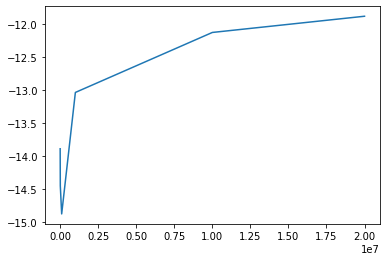

In [7]:
steps = [1000, 10000, 100000, 1000000, 10000000, 20000000]
errors = []
for s in steps:
    i = integral(figure, -200.0, 200.0, s)
    error = abs(np.pi - (i ** 2))
    errors.append(np.log10(error))
    print(f"Error for s={s}: {error}")
    
print('Log error')
plt.plot(steps, errors)
plt.show()

## Your task is to modify integration algorithms to make it more stable in terms of error

Support your modification with error graph plots. Implement your modifications and rerun the cell above. Graph should be decreasing.

# Problem 2

You will solve and [approximation](https://en.wikipedia.org/wiki/Approximation) task. Shortly, this is when you replace one math function with another, simpler one. In practice using a function which is faster to compute is a wise choice.

You are trying to approximate $f(x)=e^x$ function in a range $[0, 1]$ with a simpler linear function $g(x) = ax+b$. We will pay for computational time with an error.

You will measure a quality of approximation in fixed points $(x, f(x))$ where $x \in \{\frac{0}{10}, \frac{1}{10}, ..., \frac{10}{10}\}$ with RMSE metric.

All in all, our task is to find $a,b$ which minimize RMSE in these points:
0. Implement RMSE function for 2 matrices.
1. Implement function, finding closest point of a line to a given point.
2. Run parameter search to find the best $a, b$.

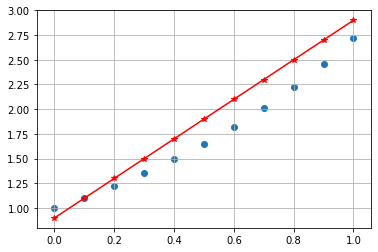

In [8]:
def f(x):
    return np.e ** x


def g(x, a, b):
    return a * x + b


def plot_approx(F, G):
    plt.grid()
    plt.scatter(F[0,:].A1, F[1,:].A1)
    plt.plot(G[0,:].A1, G[1,:].A1, color="red", marker='*')
    plt.show()
    

x = np.linspace(0, 1., 11)  # x values
fx = [f(i) for i in x]      # f(x) values
F = np.matrix([x, fx])

a, b = 2, 0.9
G = np.matrix([x, [g(i, a, b) for i in x]]) # first approximation, which looks not the best
    
plot_approx(F, G)

## Step 0
Implement RMSE.

## Step 1

Find a closest point $(u, g(u)) = (u, au+b)$ of the line to a given point $(v, f(v))$. Here is the beginning of the solution. Complete it:

$argmin_u\|\vec{(u, au+b)} - \vec{(v, f})\|$

$\frac{d(\vec{(u, au+b)} - \vec{(v, f)})^2}{du}= 0$

$\frac{d(\vec(u - v, au+b - f))^2}{du}= 0$

$\frac{d((u - v)^2 + (a*u+b - f)^2)}{du}= 0$

$2(u - v) + 2(au + b - f) * a = 0$

$2u - 2v + 2a^2u + 2ab - 2af= 0$

...

Solve this last equation for $u$.

- write an explicit formula using $\LaTeX$.

$u = ...$

- and implement and `closest(a,b,v,f)` function.

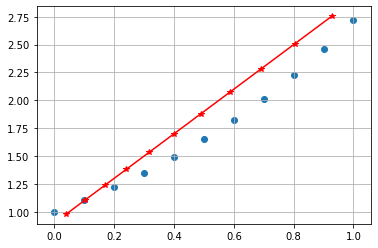

0.06540225269508242

In [13]:
def closest(a, b, v, f):
    u = 0.0
    # TODO write your code to find u
    gu = g(u, a, b)
    return u, gu

gu = [closest(a, b, x, y) for x, y in zip(x, fx)]
G = np.matrix(gu).T

plot_approx(F, G)
rmse(F, G)

## Step 2

Find the best possible pair of $(a, b)$ using grid search technique.

error=0.0267, a=1.7182, b=0.8775


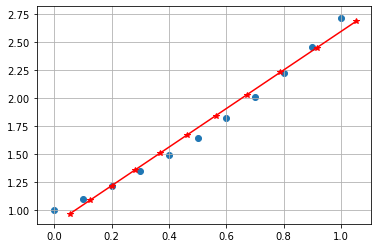

In [34]:
m, ma, mb = None, None, None

for ai in np.linspace(.5, 2.51, 100):
    for bj in np.linspace(.5, 1.51, 100):
        # TODO implement your code to find minimal ai, bj
        # store these values in ma and mb.
        pass
    
print(f"error={m:.4f}, a={ma:.4f}, b={mb:.4f}")

gu = [closest(ma, mb, x, y) for x, y in zip(x, fx)]
G = np.matrix(gu).T

plot_approx(F, G)

# Problem 3

For a graph, represented by an adjacency matrix, answer the following questions:
1. Is this a connected graph? If no, how many connected components does it have?
2. Is this a weighted graph?
3. Is this a directed graph?
4. Is this a tree or forest?
5. How many spanning trees can be constructed for this graph?
6. Plot the graph.

Support your answers with code and computations.

In [14]:
import networkx as nx
import pickle

with open("data/tutorial.graph.pkl", "rb") as f:
    M = pickle.load(f)

print(M[12, 14], M[31, 18])

0 1


## 1. Connectivity

## 2. Weighted

## 3. Directed

## 4. Tree of forest? 

## 5. Number of spanning trees

## 6. Plot